<a href="https://colab.research.google.com/github/esdrasantos/etl-faturas-nubank/blob/main/Script_Estatistica_Descritiva_Nu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importações


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from scipy.stats import norm

# Concatenando tabelas

1.   Sort
2.   Reset de índices

In [ ]:
pasta_csv = '/content/drive/MyDrive/faturas_nu_csv/'

arquivos_csv = [os.path.join(pasta_csv, arquivo) for arquivo in os.listdir(pasta_csv) if arquivo.endswith('.csv')]

lista_csv = []

for arquivo in arquivos_csv:
  csv = pd.read_csv(arquivo)
  csv["Arquivo Origem"] = os.path.basename(arquivo)

  lista_csv.append(csv)

df = pd.concat(lista_csv, ignore_index=True)

df.index.name = 'ID'

df.sort_values(by=['Arquivo Origem', 'ID'], ascending=True, inplace=True)

df.reset_index(drop=True, inplace=True)

df

,Data,Compra,Valor,Categoria,Arquivo Origem
0,01 DEZ,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv
1,04 DEZ,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv
3,04 DEZ,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv
4,04 DEZ,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv
...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,"R$ 10,09",Transporte,Nubank_2025-07-11.csv
697,02 JUL,iFood - NuPay,"R$ 72,68",Ifood,Nubank_2025-07-11.csv
698,02 JUL,•••• 6546 Uber* Trip,"R$ 10,97",Transporte,Nubank_2025-07-11.csv
699,02 JUL,•••• 6546 Uber* Trip,"R$ 8,85",Transporte,Nubank_2025-07-11.csv


# Estatística Descritiva - Análise Exploratória
--- Agrupamento por arquivo de origem
*   Média geral
*   Soma das compras
*   Média por Categoria
*   Soma por Categoria
*   Moda por Categoria (cat. mais frequente)
*   Desvio padrão por Categoria

--- Sem agrupamento
*   Média geral
*   Soma das compras
*   Média por categoria
*   Soma por categoria
*   Moda por categoria
*   Desvio padrão por categoria

--- Gráficos

〽 Histograma (dist. de frequência por intervalo de Valor)  
〽 Histograma (dist. de frequencia por categoria)  
〽 Boxplot de compras por Categoria  
〽 Proporção de compras por Categoria  
〽 Soma por Data

In [ ]:
# Normalizando string da coluna 'Valor' e conversão para ponto flutuante

df['Valor'] = df.Valor\
  .str.replace('R$', '')\
  .str.replace(',', '.')\
  .str.strip()\
  .astype(float)
df

,Data,Compra,Valor,Categoria,Arquivo Origem
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv
...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv
699,02 JUL,•••• 6546 Uber* Trip,8.85,Transporte,Nubank_2025-07-11.csv


## Medidas - Agrupamento por arquivo de origem


In [ ]:
# Média Geral

mediag = df.groupby('Arquivo Origem').Valor.mean().round(2)

mediag.reset_index(name='Média')

,Arquivo Origem,Média
0,Nubank_2025-01-11.csv,62.37
1,Nubank_2025-02-11.csv,54.79
2,Nubank_2025-03-11.csv,39.43
3,Nubank_2025-04-11.csv,53.52
4,Nubank_2025-05-11.csv,42.89
5,Nubank_2025-06-11.csv,50.52
6,Nubank_2025-07-11.csv,49.70


In [ ]:
# Soma Geral

somag = df.groupby('Arquivo Origem').Valor.sum().round(2)

somag.reset_index(name='Soma')

,Arquivo Origem,Soma
0,Nubank_2025-01-11.csv,4802.25
1,Nubank_2025-02-11.csv,4766.33
2,Nubank_2025-03-11.csv,5520.77
3,Nubank_2025-04-11.csv,4603.00
4,Nubank_2025-05-11.csv,4718.33
5,Nubank_2025-06-11.csv,4395.11
6,Nubank_2025-07-11.csv,5666.09


In [ ]:
# Média por categoria

mediac = df.groupby(['Arquivo Origem','Categoria']).Valor.mean().round(2)

mediac_r = mediac.reset_index(name='Média')

mediac_r

,Arquivo Origem,Categoria,Média
0,Nubank_2025-01-11.csv,Apostas,23.66
1,Nubank_2025-01-11.csv,Assinaturas e Servicos,44.90
2,Nubank_2025-01-11.csv,Beleza,95.34
3,Nubank_2025-01-11.csv,Casa,272.74
4,Nubank_2025-01-11.csv,Faculdade,179.13
...,...,...,...
88,Nubank_2025-07-11.csv,Outro,47.59
89,Nubank_2025-07-11.csv,Restaurantes,55.15
90,Nubank_2025-07-11.csv,Saude e Farmacia,90.10
91,Nubank_2025-07-11.csv,Shopping e ecommerce,72.59


In [ ]:
# Soma por categoria

somac = df.groupby(['Arquivo Origem', 'Categoria']).Valor.sum().round(2)

somac.reset_index(name='Soma')

,Arquivo Origem,Categoria,Soma
0,Nubank_2025-01-11.csv,Apostas,47.33
1,Nubank_2025-01-11.csv,Assinaturas e Servicos,44.90
2,Nubank_2025-01-11.csv,Beleza,95.34
3,Nubank_2025-01-11.csv,Casa,1090.97
4,Nubank_2025-01-11.csv,Faculdade,179.13
...,...,...,...
88,Nubank_2025-07-11.csv,Outro,237.96
89,Nubank_2025-07-11.csv,Restaurantes,110.30
90,Nubank_2025-07-11.csv,Saude e Farmacia,630.71
91,Nubank_2025-07-11.csv,Shopping e ecommerce,1451.81


In [ ]:
# Moda por categoria (categoria mais frequente)

# Criar coluna combinada
df['Origem_Categoria'] = df['Arquivo Origem'] + " | " + df['Categoria']

# Calcular moda
modac = df['Origem_Categoria'].mode().iloc[0]

# Frequência
freqc = (df['Origem_Categoria'] == modac).sum()

print(f"Categoria mais frequente: {modac} ({freqc} compras)")


Categoria mais frequente: Nubank_2025-03-11.csv | Transporte (43 compras)


In [ ]:
# Desvio padrão por categoria

desvioc = df.groupby(['Origem_Categoria']).Valor.std().round(2)

desvioc.reset_index(name='Desvio padrão')

print(f'Desvio padrão: {desvioc}')

Desvio padrão: Origem_Categoria
Nubank_2025-01-11.csv | Apostas                    29.82
Nubank_2025-01-11.csv | Assinaturas e Servicos       NaN
Nubank_2025-01-11.csv | Beleza                       NaN
Nubank_2025-01-11.csv | Casa                      390.11
Nubank_2025-01-11.csv | Faculdade                    NaN
                                                   ...  
Nubank_2025-07-11.csv | Outro                      51.83
Nubank_2025-07-11.csv | Restaurantes               21.43
Nubank_2025-07-11.csv | Saude e Farmacia           93.71
Nubank_2025-07-11.csv | Shopping e ecommerce       48.88
Nubank_2025-07-11.csv | Transporte                 15.89
Name: Valor, Length: 93, dtype: float64


## Medidas - Sem agrupamento


In [ ]:
# Média Geral

mediag = df['Valor'].mean().round(2)

mediag

np.float64(49.18)

In [ ]:
# Soma Geral

somag = df['Valor'].sum().round(2)

somag

np.float64(34471.88)

In [ ]:
# Média por categoria

mediac = df.groupby(['Categoria']).Valor.mean().round(2)

mediac.reset_index(name='Média')

,Categoria,Média
0,Apostas,23.66
1,Assinaturas e Servicos,27.20
2,Bar,25.29
3,Beleza,134.33
4,Casa,205.91
5,Faculdade,287.66
6,Ifood,55.07
7,Lanches e Conveniencias,21.44
8,Lavanderia,17.38
9,Mercados,53.59


In [ ]:
# Soma por categoria

somac = df.groupby(['Categoria']).Valor.sum().round(2)

somac.reset_index(name='Soma')

,Categoria,Soma
0,Apostas,47.33
1,Assinaturas e Servicos,516.80
2,Bar,303.50
3,Beleza,2821.01
4,Casa,3088.59
5,Faculdade,1725.98
6,Ifood,5176.93
7,Lanches e Conveniencias,278.71
8,Lavanderia,608.30
9,Mercados,1500.50


In [ ]:
# Moda por categoria (categoria mais frequente)

# Calcular moda
modac = df['Categoria'].mode().iloc[0]

# Frequência
freqc = (df['Categoria'] == modac).sum()

print(f"Categoria mais frequente: {modac} ({freqc} compras)")


Categoria mais frequente: Transporte (199 compras)


In [ ]:
# Desvio padrão por categoria

desvioc = df.groupby(['Categoria']).Valor.std().round(2)

desvioc.reset_index(name='Desvio padrão')

,Categoria,Desvio padrão
0,Apostas,29.82
1,Assinaturas e Servicos,15.10
2,Bar,19.74
3,Beleza,77.26
4,Casa,322.05
5,Faculdade,61.24
6,Ifood,35.11
7,Lanches e Conveniencias,8.53
8,Lavanderia,0.58
9,Mercados,54.01


In [ ]:
# Percentual de gasto por categoria do gasto total

proporcaoc = (somac/somag)*100

proporcaoc = proporcaoc.round(2)

proporcaoc.reset_index(name='Proporção %')

,Categoria,Proporção %
0,Apostas,0.14
1,Assinaturas e Servicos,1.50
2,Bar,0.88
3,Beleza,8.18
4,Casa,8.96
5,Faculdade,5.01
6,Ifood,15.02
7,Lanches e Conveniencias,0.81
8,Lavanderia,1.76
9,Mercados,4.35


In [ ]:
proporcaoc.sum() # Tem que dar 100%

np.float64(99.99000000000001)

## Gráficos

<Axes: title={'center': 'Valor'}, xlabel='[Arquivo Origem]'>

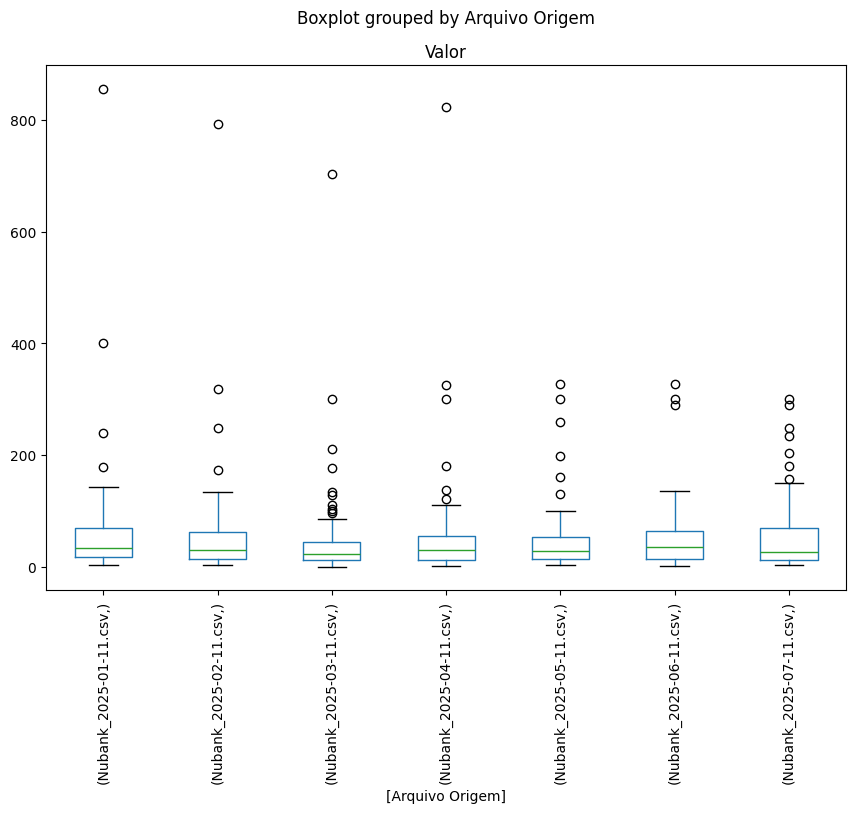

In [ ]:
df.boxplot(
    column='Valor',
    by=['Arquivo Origem'],
    figsize=(10, 7),
    grid=False,
    showfliers=True,
    rot=90)

<Axes: title={'center': 'Valor'}, xlabel='[Categoria]'>

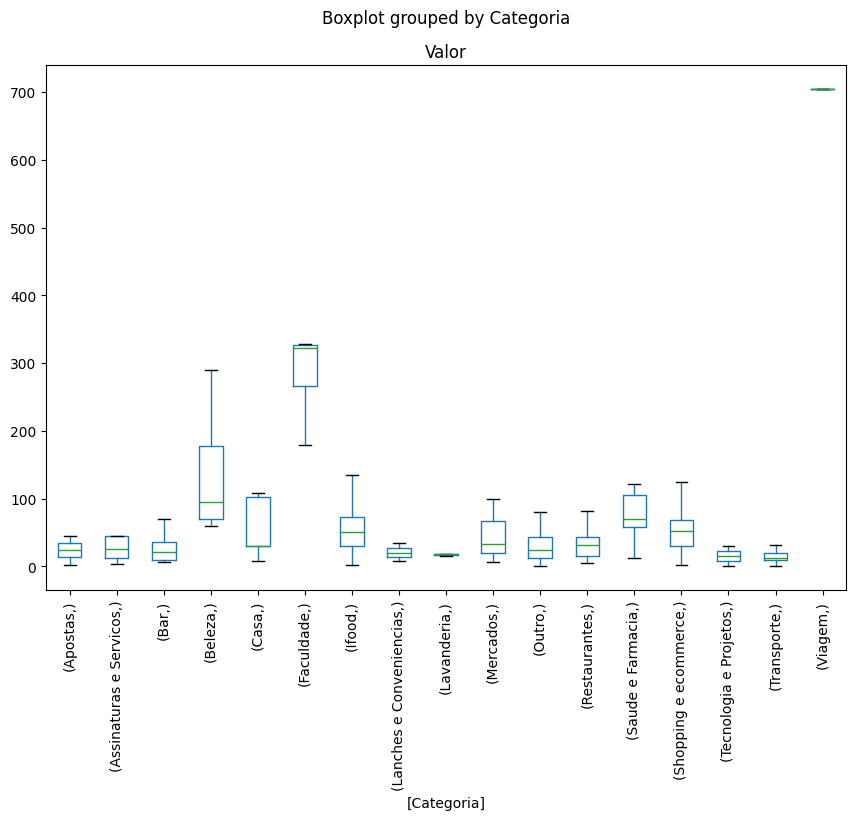

In [ ]:
df.boxplot(
    column='Valor',
    by=['Categoria'],
    figsize=(10, 7),
    grid=False,
    showfliers=False, # Outliers removidos da visualização
    rot=90)

array([[<Axes: title={'center': '(Nubank_2025-01-11.csv,)'}>,
        <Axes: title={'center': '(Nubank_2025-02-11.csv,)'}>,
        <Axes: title={'center': '(Nubank_2025-03-11.csv,)'}>],
       [<Axes: title={'center': '(Nubank_2025-04-11.csv,)'}>,
        <Axes: title={'center': '(Nubank_2025-05-11.csv,)'}>,
        <Axes: title={'center': '(Nubank_2025-06-11.csv,)'}>],
       [<Axes: title={'center': '(Nubank_2025-07-11.csv,)'}>, <Axes: >,
        <Axes: >]], dtype=object)

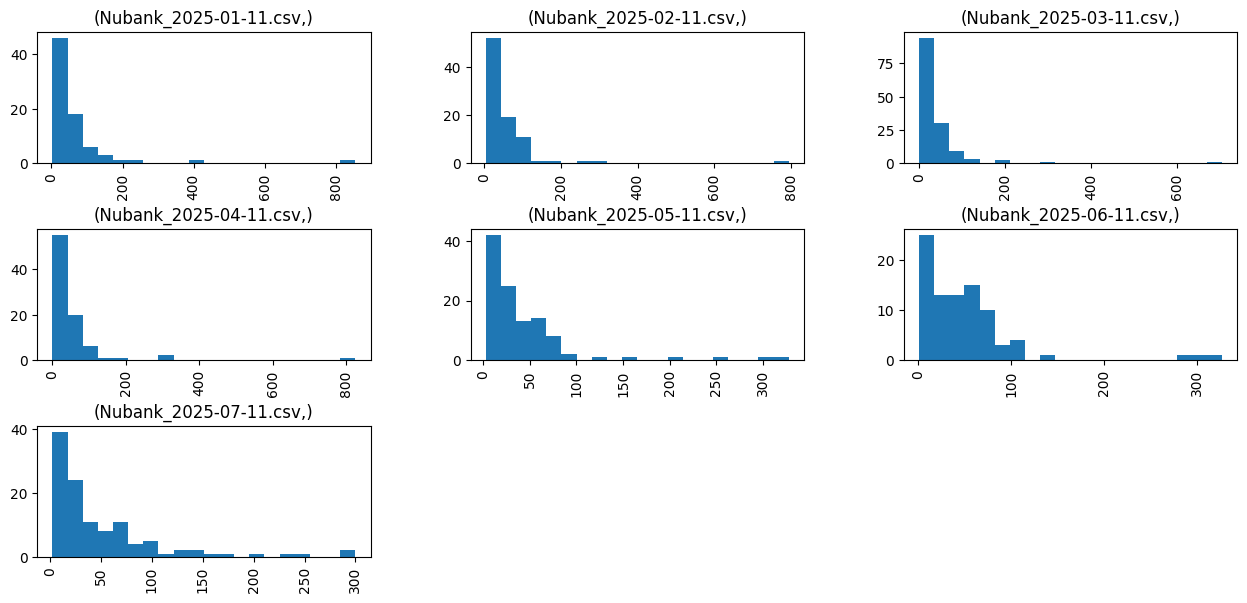

In [ ]:
df.hist(
    column='Valor',
    by=['Arquivo Origem'],
    figsize=(15, 7),
    grid=False,
    bins=20)

array([[<Axes: title={'center': '(Apostas,)'}>,
        <Axes: title={'center': '(Assinaturas e Servicos,)'}>,
        <Axes: title={'center': '(Bar,)'}>,
        <Axes: title={'center': '(Beleza,)'}>],
       [<Axes: title={'center': '(Casa,)'}>,
        <Axes: title={'center': '(Faculdade,)'}>,
        <Axes: title={'center': '(Ifood,)'}>,
        <Axes: title={'center': '(Lanches e Conveniencias,)'}>],
       [<Axes: title={'center': '(Lavanderia,)'}>,
        <Axes: title={'center': '(Mercados,)'}>,
        <Axes: title={'center': '(Outro,)'}>,
        <Axes: title={'center': '(Restaurantes,)'}>],
       [<Axes: title={'center': '(Saude e Farmacia,)'}>,
        <Axes: title={'center': '(Shopping e ecommerce,)'}>,
        <Axes: title={'center': '(Tecnologia e Projetos,)'}>,
        <Axes: title={'center': '(Transporte,)'}>],
       [<Axes: title={'center': '(Viagem,)'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

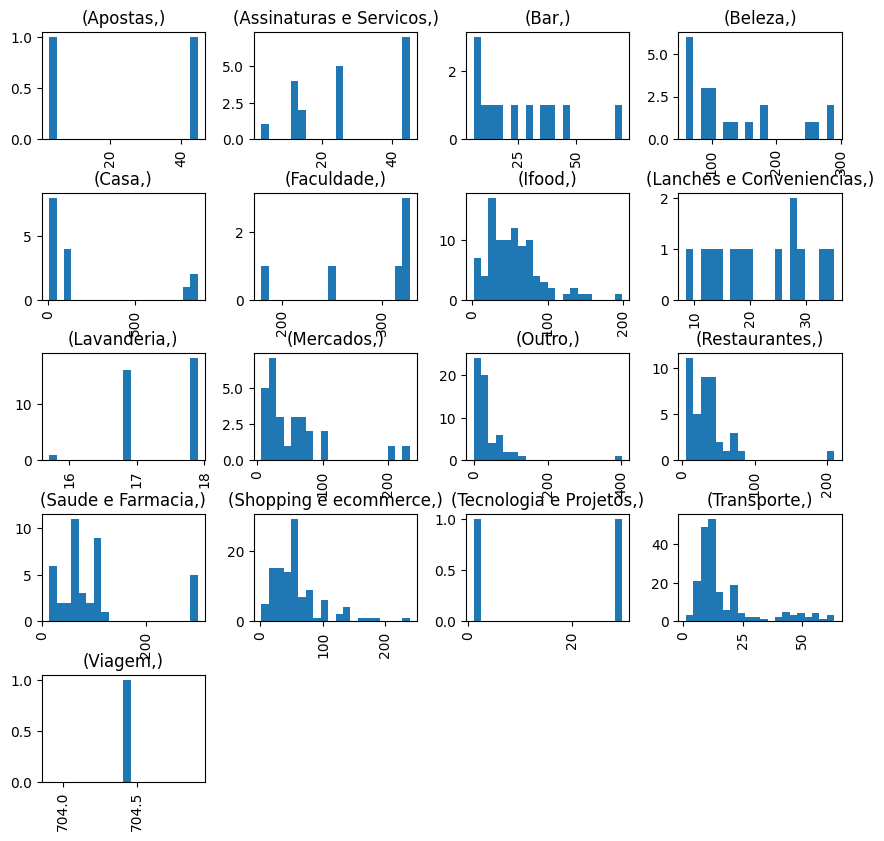

In [ ]:
df.hist(
    column='Valor',
    by=['Categoria'],
    figsize=(10, 10),
    grid=False,
    bins=20)

In [ ]:
prop_df = pd.DataFrame(proporcaoc)

prop_df.rename(columns={'index': 'Categoria', 'Valor': 'Proporção %'}, inplace=True)

prop_df.sort_values(by=['Proporção %'], ascending=False, inplace=True)

prop_df.reset_index(inplace=True)

prop_df

,Categoria,Proporção %
0,Shopping e ecommerce,18.45
1,Ifood,15.02
2,Saude e Farmacia,11.53
3,Transporte,9.80
4,Casa,8.96
5,Beleza,8.18
6,Outro,6.99
7,Faculdade,5.01
8,Restaurantes,4.48
9,Mercados,4.35


Text(0.5, 1.0, 'Proporção de Gastos por Categoria')

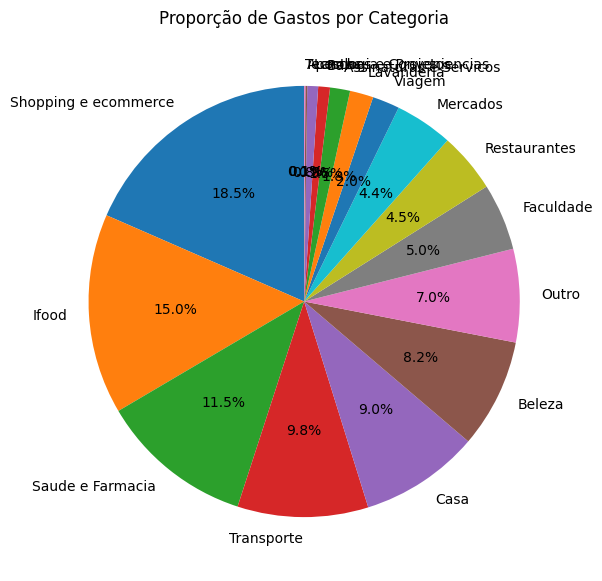

In [ ]:
prop_df.plot.pie(
    y='Proporção %',
    labels=prop_df['Categoria'],
    autopct='%1.1f%%',         # Mostra os percentuais
    startangle=90,             # Gira o gráfico
    figsize=(7, 7),          # Tamanho
    legend=False,              # Mostra legenda separada (opcional)
    ylabel='')                 # Remove o rótulo do eixo Y)

plt.title('Proporção de Gastos por Categoria')

In [ ]:
# Tabela da soma agregada por data mantendo ordenacao original (ID)

df.sort_index(inplace=True)

df.index.name = 'ID'

soma_ag_data = df.groupby(['Data'], sort=False).Valor.sum().round(2)

soma_ag_data

,Valor
Data,
01 DEZ,12.99
04 DEZ,284.67
06 DEZ,250.89
07 DEZ,165.96
08 DEZ,231.87
...,...
27 JUN,259.30
28 JUN,17.14
29 JUN,119.97


<Axes: xlabel='Data'>

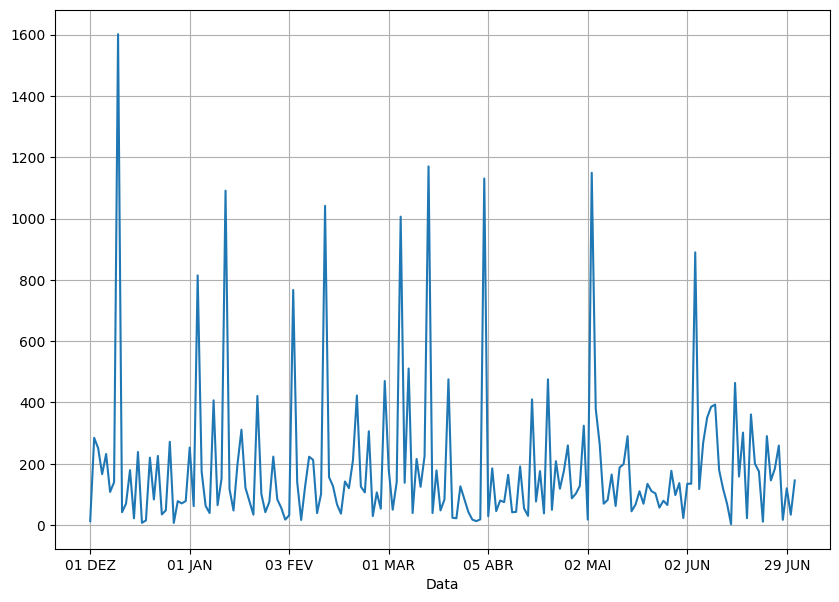

In [ ]:
# Grafico da soma agrupada em funcao da data

soma_ag_data.plot(x='Data', y='Valor', kind='line', figsize=(10, 7), grid=True)

In [ ]:
# Tabela de distribuição de frequencia de intervalos de valores (compras)
n = len(df['Valor'])     # Número  de Registros
k = 1+3.322*np.log10(n)  # Fórmula de Sturges
k = int(k)

(k,df['Valor'])

(10,
 ID
 0      12.99
 1      53.28
 2      75.50
 3      53.13
 4      55.20
        ...  
 696    10.09
 697    72.68
 698    10.97
 699     8.85
 700     5.00
 Name: Valor, Length: 701, dtype: float64)

In [ ]:
tamanho_intervalo = (df['Valor'].max() - df['Valor'].min()) / k
tamanho_intervalo

85.561

In [ ]:
df['Classe'] = pd.cut(df['Valor'], bins=k) # Bins -> definido pela Regra de Sturges

df

,Data,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe
ID,,,,,,,
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]"
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
...,...,...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]"
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]"
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]"


In [ ]:
freq_table = df['Classe'].value_counts(sort=False)

freq_table_df = pd.DataFrame(freq_table)

freq_table_df.rename(columns={'index': 'Classe', 'count': 'Frequência'}, inplace=True)

freq_table_df.reset_index(inplace=True)

freq_table_df

,Classe,Frequência
0,"(-0.856, 85.561]",616
1,"(85.561, 171.122]",56
2,"(171.122, 256.683]",12
3,"(256.683, 342.244]",12
4,"(342.244, 427.805]",1
5,"(427.805, 513.366]",0
6,"(513.366, 598.927]",0
7,"(598.927, 684.488]",0
8,"(684.488, 770.049]",1
9,"(770.049, 855.61]",3


<Axes: xlabel='Classe'>

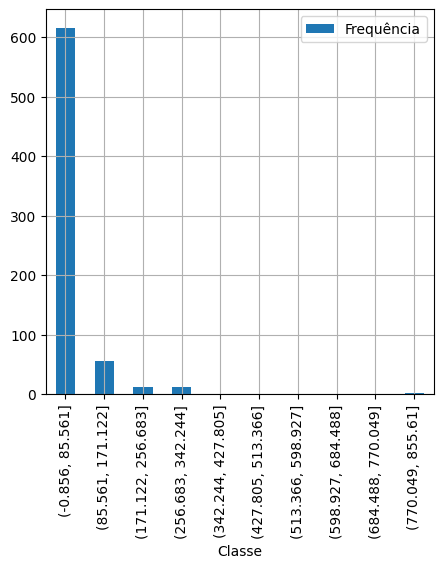

In [ ]:
freq_table_df.plot.bar(x='Classe', y='Frequência', rot=90, figsize=(5, 5), grid=True) # Deu bom a partir de tabela de distribuição de frequência


In [ ]:
freq_soma = freq_table_df['Frequência'].sum()

In [ ]:
freq_table_df['%'] = freq_table_df['Frequência']/freq_soma

freq_table_df

,Classe,Frequência,%
0,"(-0.856, 85.561]",616,0.878745
1,"(85.561, 171.122]",56,0.079886
2,"(171.122, 256.683]",12,0.017118
3,"(256.683, 342.244]",12,0.017118
4,"(342.244, 427.805]",1,0.001427
5,"(427.805, 513.366]",0,0.000000
6,"(513.366, 598.927]",0,0.000000
7,"(598.927, 684.488]",0,0.000000
8,"(684.488, 770.049]",1,0.001427
9,"(770.049, 855.61]",3,0.004280


<Axes: xlabel='Classe'>

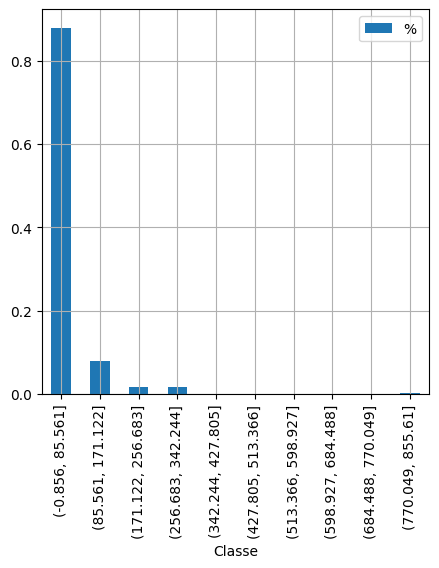

In [ ]:
freq_table_df.plot.bar(x='Classe', y='%', rot=90, figsize=(5, 5), grid=True)

## Melhorias na Mineração


In [ ]:
df_cat_outro = df[df['Categoria']=='Outro']

In [ ]:
output_dir = '/content/drive/MyDrive/faturas_nu_saidas_mineracao/'

os.makedirs(os.path.dirname(output_dir), exist_ok=True)

In [ ]:
dfs_mineracao = []
dfs_mineracao.append(('df_cat_outro.csv', df_cat_outro))

In [ ]:

purchase_category_dict = {
    'Shopping e ecommerce': {'Pag', 'Hna', 'Mercadolivre','Pdv', 'Americanas', 'Mlp', 'Mp ', 'Livraria', 'So Ler'},
    'Ifood': {'ifd', 'ifood'},
    'Restaurantes': {'Divino Fogao', 'Cafe', 'Ceu da Boca', 'Ru Unisinos', 'Bocattino', 'Restaurante', 'Bar', 'Pub', 'Coffee', 'Bistr', 'Mokai'},
    'Lanches e Conveniencias': {'Florindas', 'Happy Station', 'Postos', 'Station', 'Lanche', 'Conveniencias'},
    'Mercados': {'Macromix', 'Bourbon', 'Supermercado', 'Padaria'},
    'Shows e cinema': {'Tickets', 'Cinema'},
    'Transporte': {'Uber*', 'Citral', 'Via Sul', 'Palmares', 'Uber'},
    'Saude e Farmacia': {'Atendvip', 'Gabriel', 'Odonto', 'Oi Digital', 'Farmacia', 'Farma', 'Panvel', "Pharma"},
    'Beleza': {'Miriammf',  'Opus'},
    'Lavanderia': {'Begin'},
    'Assinaturas e Servicos': {'Netflix', 'Spotify', 'Tembici', 'Prime', 'Spotify'},
    'Casa': {'Net', 'Claro', 'Imobiliaria'},
    'Faculdade': {'Matricula'},
    'Apostas': {'Sorte'}
}

tabela = pd.DataFrame(columns=['Categoria', 'Palavra'])

for key in purchase_category_dict.keys():
  for value in purchase_category_dict[key]:
    tabela.loc[len(tabela)] = [key, value]

dfs_mineracao.append(('categorias.csv', tabela))

tabela.head()

,Categoria,Palavra
0,Shopping e ecommerce,So Ler
1,Shopping e ecommerce,Mlp
2,Shopping e ecommerce,Mercadolivre
3,Shopping e ecommerce,Hna
4,Shopping e ecommerce,Pdv


In [ ]:
for (name, dataframe) in dfs_mineracao:

  output_path = os.path.join(output_dir, name)
  df.to_csv(output_path, index=False)

## Probabilidades










## Probabilidade Simples
1. Probabilidade Simples
  * Qual a chance da compra ser maior que R$215,00?
> P(Valor>215) = (Nº de Compras com Valor > 215) / Total de Compras
  * Qual a probabilidade de uma compra ser de uma categoria x?
> P(Categoria=x) = (Nº de Compras de Categoria = x) / Total de Compras
  * Qual a chance de uma compra ser feita no final de semana?
> P(Data=x e {sabado,domingo}) = (Nº de Compras por Dia da Semana) / Total de Compras

In [ ]:
df

,Data,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe
ID,,,,,,,
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]"
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]"
...,...,...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]"
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]"
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]"


In [ ]:
f_classes = pd.DataFrame(df['Classe'].value_counts(sort=False))

f_classes.reset_index(inplace=True)

f_classes.rename(columns={'index': 'Classe', 'count': 'Frequência'}, inplace=True)

f_classes

,Classe,Frequência
0,"(-0.856, 85.561]",616
1,"(85.561, 171.122]",56
2,"(171.122, 256.683]",12
3,"(256.683, 342.244]",12
4,"(342.244, 427.805]",1
5,"(427.805, 513.366]",0
6,"(513.366, 598.927]",0
7,"(598.927, 684.488]",0
8,"(684.488, 770.049]",1
9,"(770.049, 855.61]",3


In [ ]:
f_soma = f_classes['Frequência'].sum()

f_soma

np.int64(701)

In [ ]:
f_classes['%'] = (f_classes['Frequência']/f_soma)

f_classes

,Classe,Frequência,%
0,"(-0.856, 85.561]",616,0.878745
1,"(85.561, 171.122]",56,0.079886
2,"(171.122, 256.683]",12,0.017118
3,"(256.683, 342.244]",12,0.017118
4,"(342.244, 427.805]",1,0.001427
5,"(427.805, 513.366]",0,0.000000
6,"(513.366, 598.927]",0,0.000000
7,"(598.927, 684.488]",0,0.000000
8,"(684.488, 770.049]",1,0.001427
9,"(770.049, 855.61]",3,0.004280


In [ ]:
# Qual a chance da compra ser maior que R$215,00?

valor = 215.00

f_classes['Lim_inferior'] = f_classes['Classe'].apply(lambda x: x.left)

f_classes['Lim_superior'] = f_classes['Classe'].apply(lambda x: x.right)

f_classes['Lim_central'] = f_classes.apply(lambda x: (x['Lim_inferior'] + x['Lim_superior']) / 2, axis=1)

f_classes

,Classe,Frequência,%,Lim_inferior,Lim_superior,Lim_central
0,"(-0.856, 85.561]",616,0.878745,-0.856,85.561,42.3525
1,"(85.561, 171.122]",56,0.079886,85.561,171.122,128.3415
2,"(171.122, 256.683]",12,0.017118,171.122,256.683,213.9025
3,"(256.683, 342.244]",12,0.017118,256.683,342.244,299.4635
4,"(342.244, 427.805]",1,0.001427,342.244,427.805,385.0245
5,"(427.805, 513.366]",0,0.000000,427.805,513.366,470.5855
6,"(513.366, 598.927]",0,0.000000,513.366,598.927,556.1465
7,"(598.927, 684.488]",0,0.000000,598.927,684.488,641.7075
8,"(684.488, 770.049]",1,0.001427,684.488,770.049,727.2685
9,"(770.049, 855.61]",3,0.004280,770.049,855.610,812.8295


In [ ]:
min_dist = f_classes['Lim_central'].apply(lambda x: abs(valor-x)).min()

min_dist

1.0974999999999966

In [ ]:
fclasses_s = f_classes[f_classes['Lim_central']-valor >= min_dist]['%']

In [ ]:
print("Qual a chance da compra ser maior que R$215,00?", f"{round(fclasses_s.sum() * 100,2)}%")

Qual a chance da compra ser maior que R$215,00? 2.43%


In [ ]:
# Qual a probabilidade de uma compra ser de uma categoria x?

f_categorias = pd.DataFrame(df['Categoria'].value_counts(sort=True))

f_categorias.reset_index(inplace=True)

f_categorias.rename(columns={'index': 'Categoria', 'count': 'Frequência'}, inplace=True)

f_categorias

,Categoria,Frequência
0,Transporte,199
1,Shopping e ecommerce,111
2,Ifood,94
3,Outro,60
4,Restaurantes,42
5,Saude e Farmacia,41
6,Lavanderia,35
7,Mercados,28
8,Beleza,21
9,Assinaturas e Servicos,19


In [ ]:
f_soma = f_categorias['Frequência'].sum()

f_soma

np.int64(701)

In [ ]:
f_categorias['%'] = (f_categorias['Frequência']/f_soma)

f_categorias

,Categoria,Frequência,%
0,Transporte,199,0.283880
1,Shopping e ecommerce,111,0.158345
2,Ifood,94,0.134094
3,Outro,60,0.085592
4,Restaurantes,42,0.059914
5,Saude e Farmacia,41,0.058488
6,Lavanderia,35,0.049929
7,Mercados,28,0.039943
8,Beleza,21,0.029957
9,Assinaturas e Servicos,19,0.027104


In [ ]:
categoria = 'Saude e Farmacia'

f_categorias[f_categorias['Categoria']==categoria]['%']

,%
5,0.058488


In [ ]:
print(f"Qual a probabilidade de uma compra ser de uma categoria {categoria}?",
      f"{round(f_categorias[f_categorias['Categoria']==categoria]['%'].iloc[0] * 100,2)}%")

Qual a probabilidade de uma compra ser de uma categoria Saude e Farmacia? 5.85%


In [ ]:
# Qual a chance de uma compra ser feita no final de semana?

df['Fech. Fatura'] = df['Arquivo Origem']\
.str.rsplit('_', n=1).str[1]\
.str.split('.').str[0]

df

,Data,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura
ID,,,,,,,,
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11
...,...,...,...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11


In [ ]:
df['Dia'] = df['Data'].str.split(' ').str[0]
df['Mes'] = df['Data'].str.split(' ').str[1]
df['Ano'] = df['Fech. Fatura'].str.split('-').str[0]

meses = {
    "JAN": 1,
    "FEV": 2,
    "MAR": 3,
    "ABR": 4,
    "MAI": 5,
    "JUN": 6,
    "JUL": 7,
    "AGO": 8,
    "SET": 9,
    "OUT": 10,
    "NOV": 11,
    "DEZ": 12
}

df['N Mes'] = df['Mes'].map(meses)

df

,Data,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura,Dia,Mes,Ano,N Mes
ID,,,,,,,,,,,,
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11,01,DEZ,2025,12
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,04,DEZ,2025,12
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,04,DEZ,2025,12
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,04,DEZ,2025,12
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,04,DEZ,2025,12
...,...,...,...,...,...,...,...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,02,JUL,2025,7
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11,02,JUL,2025,7
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,02,JUL,2025,7


In [ ]:
from datetime import datetime
df['Data_2'] = df['Ano'] + '-' + df['N Mes'].astype(str) + '-' + df['Dia']

df['Data_2'] = pd.to_datetime(df['Data_2'])

df.drop(columns=['Dia', 'Mes', 'Ano', 'N Mes'], inplace=True)

df

,Data,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura,Data_2
ID,,,,,,,,,
0,01 DEZ,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11,2025-12-01
1,04 DEZ,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2025-12-04
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2025-12-04
3,04 DEZ,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2025-12-04
4,04 DEZ,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2025-12-04
...,...,...,...,...,...,...,...,...,...
696,02 JUL,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02
697,02 JUL,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11,2025-07-02
698,02 JUL,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02


In [ ]:
df["Data_Dif"] = pd.to_datetime(df["Fech. Fatura"]) - pd.to_datetime(df["Data_2"])

df["Data_Dif_Ano"] = np.floor(df["Data_Dif"].dt.days / 365)

df['Data_2'] = df.apply(lambda x: x['Data_2'] + pd.DateOffset(years=x['Data_Dif_Ano']), axis=1)

df.drop(columns=['Data_Dif', 'Data_Dif_Ano', 'Data'], inplace=True)

df.rename(columns={'Data_2': 'Data'}, inplace=True)

df

,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura,Data
ID,,,,,,,,
0,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11,2024-12-01
1,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04
2,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04
3,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04
4,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04
...,...,...,...,...,...,...,...,...
696,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02
697,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11,2025-07-02
698,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02


In [ ]:
# Coluna com dia da semana

df['Dia da semana'] = df['Data'].dt.dayofweek

df

,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura,Data,Dia da semana
ID,,,,,,,,,
0,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11,2024-12-01,6
1,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
2,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
3,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
4,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
...,...,...,...,...,...,...,...,...,...
696,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02,2
697,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11,2025-07-02,2
698,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02,2


In [ ]:
f_dia_da_semana = pd.DataFrame(df['Dia da semana'].value_counts(sort=True))

f_dia_da_semana.reset_index(inplace=True)

f_dia_da_semana.rename(columns={'index': 'Dia da semana', 'count': 'Frequência'}, inplace=True)

f_dia_da_semana

,Dia da semana,Frequência
0,4,133
1,6,119
2,3,112
3,1,95
4,5,92
5,2,82
6,0,68


In [ ]:
f_dia_da_semana_soma = f_dia_da_semana['Frequência'].sum()

f_dia_da_semana['%'] = (f_dia_da_semana['Frequência']/f_dia_da_semana_soma)

f_dia_da_semana

,Dia da semana,Frequência,%
0,4,133,0.189729
1,6,119,0.169757
2,3,112,0.159772
3,1,95,0.135521
4,5,92,0.131241
5,2,82,0.116976
6,0,68,0.097004


In [ ]:
# Qual a chance de uma compra ser feita no final de semana?

f_sab_dom = f_dia_da_semana[f_dia_da_semana['Dia da semana'].isin([5,6])]['%']

f_sab_dom_soma = f_sab_dom.sum()*100

f_sab_dom_soma

np.float64(30.099857346647646)

In [ ]:
print('Qual a chance de uma compra ser feita no final de semana?', f'{round(f_sab_dom_soma,2)}%')

Qual a chance de uma compra ser feita no final de semana? 30.1%


## Probabilidade Conjunta

1. Qual a probabilidade da compra ser maior que R$30,00 e ser de Transporte?

    P(Valor>=30 e Categoria = Transporte) = ((Nº de Compras com Valor >= 30)/Total de Compras) * (Nº de Compras de Categ. = 'Transporte'/Total de Compras)

    P(Valor>=30 e Categoria = Transporte) = (Nº de Compras com Categ. = Transporte e Valor >= 30) / Total de Compras






In [ ]:
valor_cat = df[['Categoria','Valor']]

valor_cat_c = valor_cat[(valor_cat['Categoria']=='Transporte') & (valor_cat['Valor']>=30)]

valor_cat_c.head()

,Categoria,Valor
ID,,
59,Transporte,48.01
67,Transporte,45.91
90,Transporte,40.58
95,Transporte,56.57
122,Transporte,47.92


In [ ]:
valor_cat_prob = valor_cat_c.shape[0]/valor_cat.shape[0]

print('Qual a probabilidade da compra ser maior que R$30,00 e ser de Transporte', f'{round(valor_cat_prob*100,2)}%')

Qual a probabilidade da compra ser maior que R$30,00 e ser de Transporte 3.71%


In [ ]:
valor_df = df[['Categoria','Valor']]

valor_df_prob = valor_df[valor_df['Valor']>= 30].count() / valor_df.count()

valor_df_prob = valor_df_prob.iloc[0]

print('Qual a probabilidade da compra ser maior que R$30,00?', f'{round(valor_df_prob*100,2)}%')

Qual a probabilidade da compra ser maior que R$30,00? 47.22%


In [ ]:
cat_df = df[['Categoria','Valor']]

cat_df_prob = cat_df[cat_df['Categoria']=='Transporte'].count() / cat_df.count()

cat_df_prob = cat_df_prob.iloc[0]

print('Qual a probabilidade da compra ser de Transporte?', f'{round(cat_df_prob,2)}%')
#

Qual a probabilidade da compra ser de Transporte? 0.28%


## Probabilidade de Exceder Limites


In [ ]:
df

,Compra,Valor,Categoria,Arquivo Origem,Origem_Categoria,Classe,Fech. Fatura,Data,Dia da semana
ID,,,,,,,,,
0,Uber* Trip,12.99,Transporte,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Transporte,"(-0.856, 85.561]",2025-01-11,2024-12-01,6
1,Amazon Marketplace - Parcela 2/7,53.28,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
2,Saoleopoldomeias - Parcela 2/4,75.50,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
3,Amazon Marketplace - Parcela 7/8,53.13,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
4,Amazon Marketplace - Parcela 3/6,55.20,Shopping e ecommerce,Nubank_2025-01-11.csv,Nubank_2025-01-11.csv | Shopping e ecommerce,"(-0.856, 85.561]",2025-01-11,2024-12-04,2
...,...,...,...,...,...,...,...,...,...
696,•••• 6546 Uber* Trip,10.09,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02,2
697,iFood - NuPay,72.68,Ifood,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Ifood,"(-0.856, 85.561]",2025-07-11,2025-07-02,2
698,•••• 6546 Uber* Trip,10.97,Transporte,Nubank_2025-07-11.csv,Nubank_2025-07-11.csv | Transporte,"(-0.856, 85.561]",2025-07-11,2025-07-02,2


In [ ]:
# Qual a chance de meus gastos mensais ultrapassarem R$ 5.000?

soma_fatura = pd.DataFrame(df.groupby(['Arquivo Origem']).Valor.sum().round(2))

soma_total = soma_fatura.sum()

soma_fatura['%'] = soma_fatura/soma_total

soma_fatura.sort_values(by=['%'], ascending=False, inplace=True)

soma_fatura

,Valor,%
Arquivo Origem,,
Nubank_2025-07-11.csv,5666.09,0.164368
Nubank_2025-03-11.csv,5520.77,0.160153
Nubank_2025-01-11.csv,4802.25,0.139309
Nubank_2025-02-11.csv,4766.33,0.138267
Nubank_2025-05-11.csv,4718.33,0.136875
Nubank_2025-04-11.csv,4603.00,0.133529
Nubank_2025-06-11.csv,4395.11,0.127498


In [ ]:
acima_c = soma_fatura[(soma_fatura['Valor']>=5000)].shape[0]

total_c = soma_fatura['Valor'].shape[0]

print('Qual a chance de meus gastos mensais ultrapassarem R$ 5.000?', f'{round(acima_c/total_c*100,2)}%')

Qual a chance de meus gastos mensais ultrapassarem R$ 5.000? 28.57%


## Experimento de Bernoulli

1. Qual a chance de ter ao menos uma compra de Shopping e ecommerce numa Quinta-Feira (dayofweek=3)

In [ ]:
# Qual a chance de ter ao menos uma compra de Shopping e ecommerce numa Quinta-Feira (dayofweek=3)

df_shopping = df[df['Categoria']=='Shopping e ecommerce']

df_shopping_quinta = df_shopping[df_shopping['Dia da semana']==3]

shopping_quinta_prob = df_shopping_quinta.shape[0]/df.shape[0]

round(shopping_quinta_prob*100,2)  # Não responde a pergunta! Isso responde à 'Qual a chance de qualquer compra ser Shopping e ecommerce numa quinta?'

1.43

In [ ]:
# O código abaixo responde. Reformulando a pergunta probabilidade de que, num período qualquer (ex.: numa semana), exista ao menos uma compra de Shopping e ecommerce numa Quinta-feira

# Dividir seus dados em períodos (ex.: semanas)

# Contar em quantas semanas houve ao menos uma compra de “Shopping e ecommerce” numa quinta

# Dividir pelo total de semanas analisadas


df['Semana'] = df['Data'].dt.isocalendar().week

df_shopping_quinta = df[
    (df['Categoria'] == 'Shopping e ecommerce') &
    (df['Dia da semana'] == 3)
]

semanas_shopping_quinta = df_shopping_quinta['Semana'].nunique()

total_semanas = df['Semana'].nunique()

print('Qual a chance de ter ao menos uma compra de Shopping e ecommerce numa Quinta-feira?', f'{round(semanas_shopping_quinta/total_semanas*100,2)}%')

Qual a chance de ter ao menos uma compra de Shopping e ecommerce numa Quinta-feira? 21.88%


In [ ]:
df['Semana'] = df['Data'].dt.isocalendar().week

df_ifood_quinta = df[
    (df['Categoria'] == 'Ifood') &
    (df['Dia da semana'] == 3)
]

semanas_ifood_quinta = df_ifood_quinta['Semana'].nunique()

total_semanas = df['Semana'].nunique()

print('Qual a chance de ter ao menos uma compra de Ifood numa Quinta-feira?', f'{round(semanas_ifood_quinta/total_semanas*100,2)}%')

Qual a chance de ter ao menos uma compra de Ifood numa Quinta-feira? 31.25%


## Contingência de Teste de Independência


In [ ]:
contingencia = pd.crosstab(df['Categoria'], df['Dia da semana'])

contingencia

Dia da semana,0,1,2,3,4,5,6
Categoria,,,,,,,
Apostas,0,1,0,0,1,0,0
Assinaturas e Servicos,4,5,1,4,2,2,1
Bar,0,1,0,1,1,0,9
Beleza,0,1,1,4,5,5,5
Casa,0,2,1,3,3,3,3
Faculdade,1,1,1,3,0,0,0
Ifood,13,14,9,14,13,16,15
Lanches e Conveniencias,2,1,1,1,4,2,2
Lavanderia,9,3,6,6,1,8,2


In [ ]:
from scipy.stats import chi2_contingency


# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\nEstatística qui-quadrado:", chi2)
print("p-valor:", p)
print("Graus de liberdade:", dof)

if p < 0.05:
    print("Existe dependência entre Categoria e Dia da semana.")
else:
    print("Não há evidência de dependência entre Categoria e Dia da semana.")


Estatística qui-quadrado: 175.84196129923896
p-valor: 1.2509786447076242e-06
Graus de liberdade: 96
Existe dependência entre Categoria e Dia da semana.


# Distribuição

* Meus gastos têm distribuição simétrica ou são enviesados (skewed)?

* Tenho muitos gastos pequenos e alguns enormes (cauda longa)?

* O gasto médio representa bem meu comportamento?

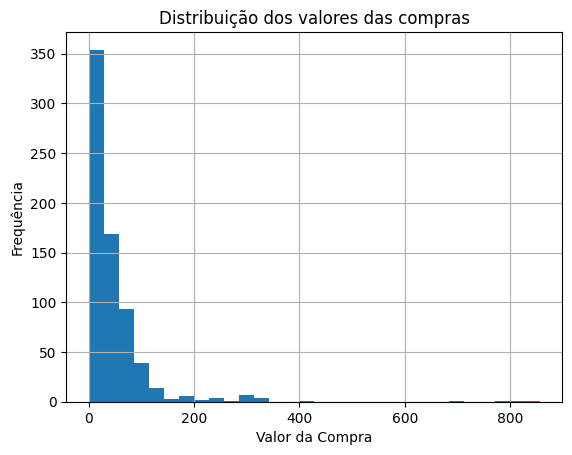

In [ ]:
df['Valor'].hist(bins=30)
plt.xlabel('Valor da Compra')
plt.ylabel('Frequência')
plt.title('Distribuição dos valores das compras')
plt.show()

<Axes: xlabel='Valor'>

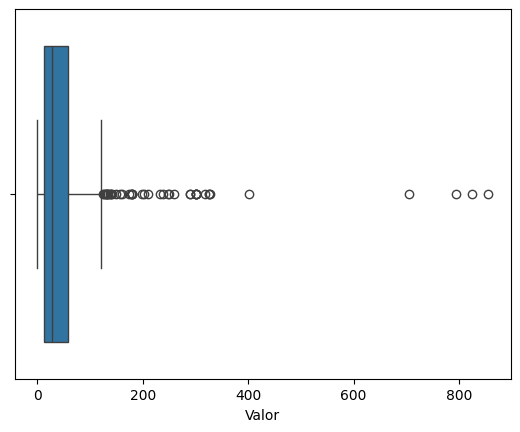

In [ ]:
import seaborn as sns

sns.boxplot(x=df['Valor'])

In [ ]:
# Skewness → mede assimetria
# Kurtosis → mede cauda

skew = df['Valor'].skew()

if skew > 0:
  print('Cauda à direita')
elif skew == 0:
  print('Distribuição simétrica')
else:
  print('Cauda à esquerda')

kurt = df['Valor'].kurt()

if kurt == 3 or kurt == 0:
  print('Dist. Mesocúrtica: Normal', kurt)
elif kurt > 0:
  print('Dist. Leptocúrtica: Pico mais alto com cauda pesada', kurt)
else:
  print('Dist. Platicúrtica: Pico achatado com cauda leve, dispersa', kurt)


Cauda à direita
Dist. Leptocúrtica: Pico mais alto com cauda pesada 51.65927217462172


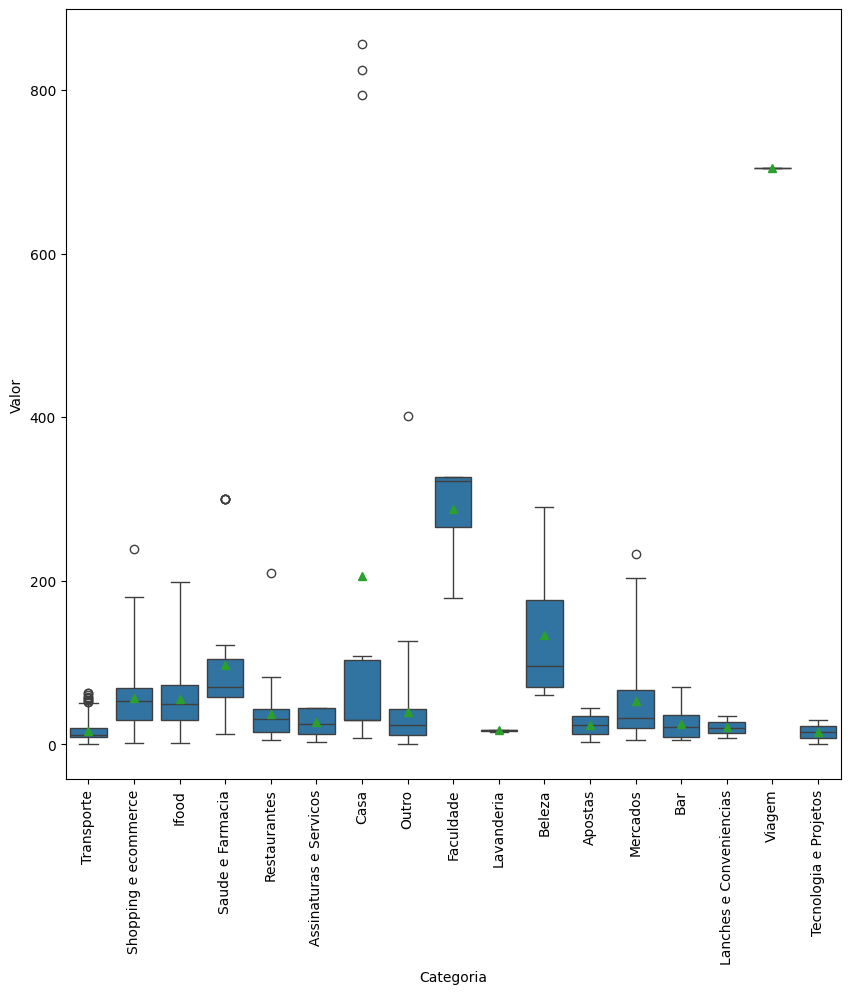

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Categoria', y='Valor', data=df, showmeans=True, whis=3.0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Densidade de probabilidade - Distribuição empírica acumulada (ECDF)

valores = np.sort(df['Valor'])
ecdf = np.arange(1, len(valores)+1) / len(valores)

valores[1:10]

array([0.  , 1.  , 1.1 , 1.5 , 2.29, 2.58, 2.81, 3.  , 3.  ])

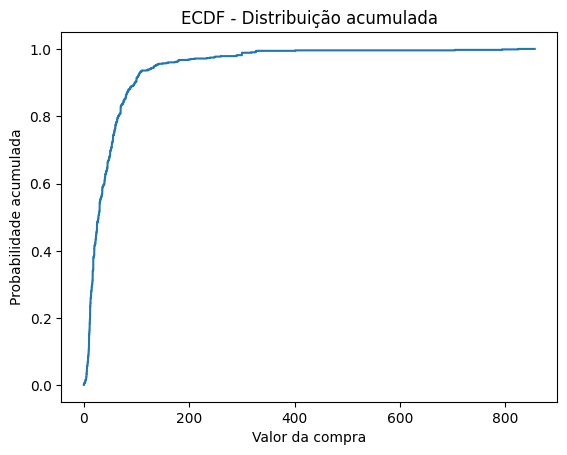

Mostra que quase todas as compras tem valor menor ou igual R$200,00


In [ ]:
plt.step(valores, ecdf)
plt.xlabel('Valor da compra')
plt.ylabel('Probabilidade acumulada')
plt.title('ECDF - Distribuição acumulada')
plt.show()

print('Mostra que quase todas as compras tem valor menor ou igual R$200,00')

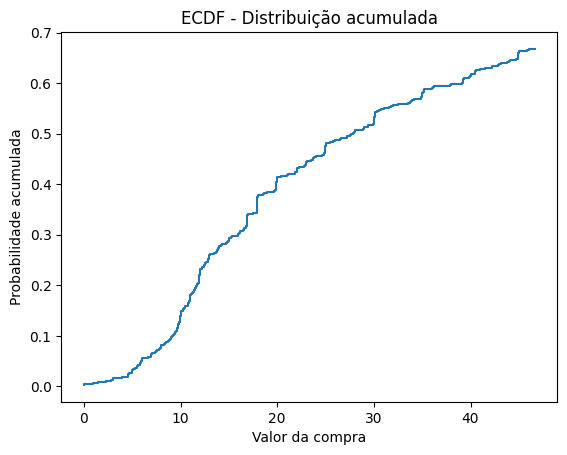

Mostra que 70% de todas as compras tem valor menor ou igual R$45,00


In [ ]:
tamanho = np.ceil(len(valores)/1.5)

plt.step(valores[1:int(tamanho)], ecdf[1:int(tamanho)])
plt.xlabel('Valor da compra')
plt.ylabel('Probabilidade acumulada')
plt.title('ECDF - Distribuição acumulada')
plt.show()
print('Mostra que 70% de todas as compras tem valor menor ou igual R$45,00')

## Distribuições Teóricas


### Distr. Exponencial

expon.fit() -> (loc, scale)

f(x) = (1/scale).e^(loc+x / scale)


In [ ]:
from scipy.stats import expon

param = expon.fit(df['Valor'])

print(param)

(0.0, 49.175292439372335)


[ 8.64252525 17.28505051 25.92757576 34.57010101]


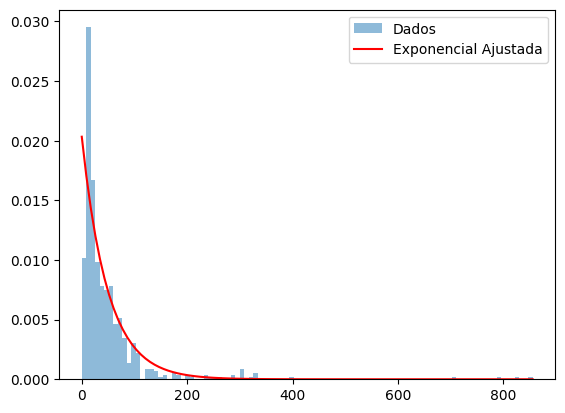

In [ ]:
x = np.linspace(df['Valor'].min(), df['Valor'].max(),  100)

print(x[1:5])

pdf = expon.pdf(x, loc=param[0], scale=param[1])

plt.hist(df['Valor'], bins=100, density=True, alpha=0.5, label='Dados')
plt.plot(x, pdf, 'r-', label='Exponencial Ajustada')
plt.legend()
plt.show()

### Distribuição Poisson (para contar eventos)

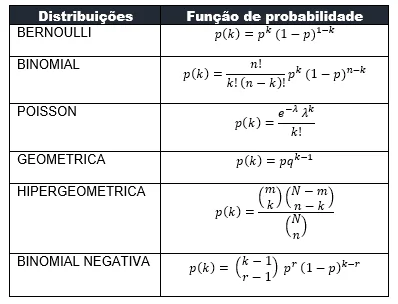

In [ ]:
df_qtd_compras = pd.DataFrame(df.groupby('Data').size()).reset_index()

df_qtd_compras.rename(columns={0: 'Quantidade de Compras'}, inplace=True)

df_qtd_compras.sort_values(by='Quantidade de Compras', ascending=False, inplace=True)

df_qtd_compras.head(5)

,Data,Quantidade de Compras
126,2025-05-04,19
78,2025-03-04,19
51,2025-02-04,16
99,2025-04-04,16
115,2025-04-20,16


Text(0.5, 0, 'Número de compras por dia')

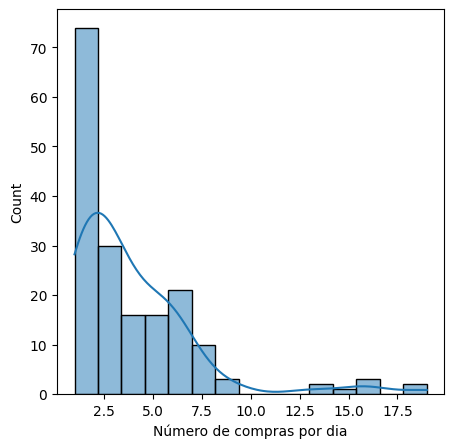

In [ ]:
compra_por_dia = df.groupby('Data').size()
plt.figure(figsize=(5, 5))
sns.histplot(compra_por_dia, bins=15, kde=True)
plt.xlabel('Número de compras por dia')

### Quantis

In [ ]:
df['Valor'].quantile([0.25, 0.5, 0.75])

,Valor
0.25,12.90
0.50,27.90
0.75,57.49


### Percentis

In [ ]:
df['Valor'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Valor
0.1,9.28
0.2,11.70
0.3,15.99
0.4,19.90
0.5,27.90
0.6,39.17
0.7,51.63
0.8,66.14
0.9,97.80


### Ao longo do tempo

<Axes: xlabel='Mes', ylabel='Valor'>

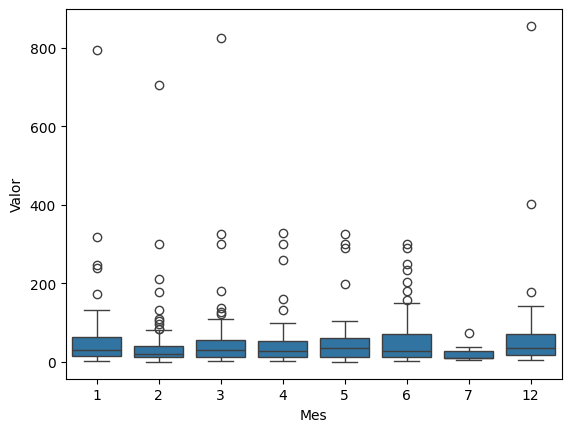

In [ ]:
df_mes = df

df_mes['Mes'] = df_mes['Data'].dt.month

sns.boxplot(x='Mes', y='Valor', data=df_mes)

# Inferência Estatística

## Teorema do Limite Central

Se você tirar muitas amostras aleatórias de tamanho 𝑛, a distribuição das médias amostrais tende a ser Normal, mesmo se os dados originais não forem.

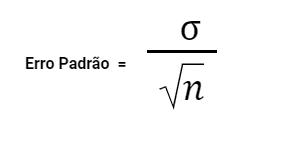

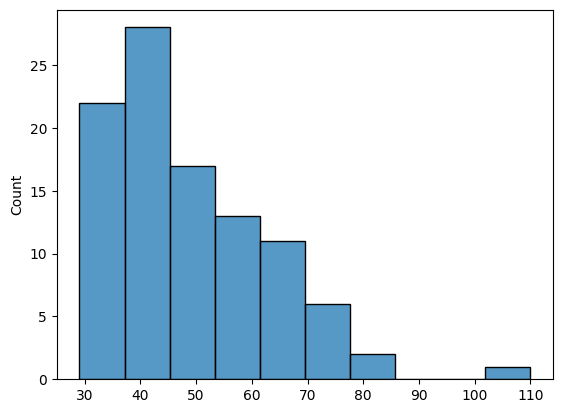

In [ ]:
valores = df['Valor']
n = 30
amostras = []

for i in range(100):
  amostra = np.random.choice(valores, n, replace=True)
  amostras.append(np.mean(amostra))

sns.histplot(amostras)

df_amostras = pd.DataFrame(amostras)

In [ ]:
std_amostral =  round(df_amostras.std().iloc[0],2)
print('Desvio padrão amostral', std_amostral)

Desvio padrão amostral 14.42


In [ ]:
std_pop_teo = round(std_amostral * np.sqrt(n),2)
print('Desvio padrão populacional teórico', std_pop_teo)

Desvio padrão populacional teórico 78.98


In [ ]:
std_pop_real  = round(df['Valor'].std(),2)
print('Desvio padrão populacional real', std_pop_real)

Desvio padrão populacional real 77.29


## Probabilidade na estimativa de parâmetros

Probabilidade acumulada até Z (CDF)


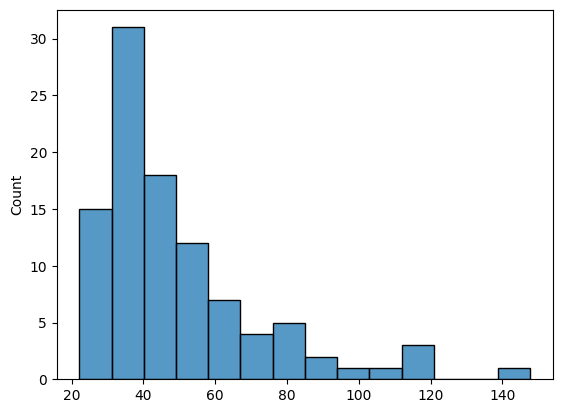

In [ ]:
# Qual a probabilidade de a média de 10 compras ficar abaixo de R$ 55?

valores = df['Valor']
n = 10
amostras = []

for i in range(100):
  amostra = np.random.choice(valores, n, replace=True)
  amostras.append(np.mean(amostra))

sns.histplot(amostras)

df_amostras = pd.DataFrame(amostras)

<Axes: ylabel='Count'>

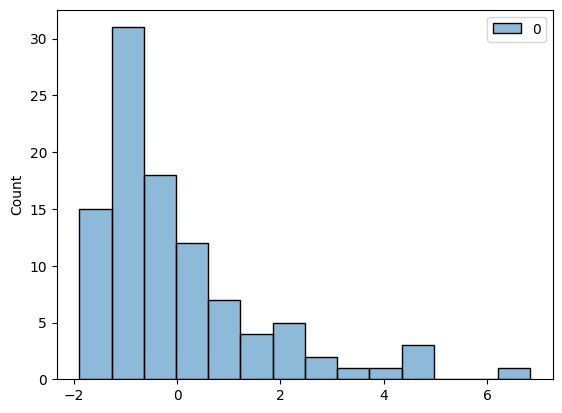

In [ ]:
mu = np.mean(df_amostras)  # média amostral
sigma = std_amostral       # desvio amostral
df_z_core =  (df_amostras - mu) / sigma  # Normalização - curva z
sns.histplot(df_z_core)

In [ ]:
x = 55.00
z = (x - mu) / sigma
z

np.float64(0.391511095700416)

In [ ]:
prob = round(norm.cdf(z)*100, 2)

print(f'Qual a probabilidade de a média de {n} compras ficar abaixo de R$ {x}?', f'{prob}%')

Qual a probabilidade de a média de 10 compras ficar abaixo de R$ 55.0? 65.23%


In [ ]:
# Qual a probabilidade de mais de 5% das minhas próximas 20 compras serem acima de R$ 200?

# Proporção histórica de compras > 200

x = 200.00
prop_mp = df[df['Valor'] > x]
p = len(prop_mp['Valor']) / len(df['Valor'])
p

0.03281027104136947

In [ ]:
n = 20
p_chapeu = 0.05
sigma_p = np.sqrt(p * (1 - p) / n)
print(f"Desvio padrão da proporção amostral: {sigma_p:.4f}")

Desvio padrão da proporção amostral: 0.0398


In [ ]:
z_p = (p_chapeu-p) / sigma_p
z_p

np.float64(0.43154220847623936)

In [ ]:
# p acima

p_acima = 1 - norm.cdf(z_p)
print(f'Qual a probabilidade de mais de {p_chapeu*100}% das minhas próximas {n} compras serem acima de R$ {x}?', f'{round(p_acima*100,2)}%')

Qual a probabilidade de mais de 5.0% das minhas próximas 20 compras serem acima de R$ 200.0? 33.3%


## T-teste para médias (REVER)

In [ ]:
# Será que gasto mais em Ifood do que em Restaurantes?

ifood = df[df['Categoria'] == 'Ifood']
restaurante = df[df['Categoria'] == 'Restaurantes']

m_ifood = ifood['Valor'].mean()
m_restaurante = restaurante['Valor'].mean()

variancia_ifood = ifood['Valor'].var(ddof=1)
variancia_restaurante = restaurante['Valor'].var(ddof=1)

n1 = len(ifood)
n2 = len(restaurante)

se = np.sqrt(variancia_ifood/n1 + variancia_restaurante/n2)
t = (m_ifood - m_restaurante) / se

print("t =", t)

t = 2.8966483581958777


# Intervalo de Confiança

## IC para Média dos Gastos

*Aproximação normal: t-student*

Observação: esse não é um bom método para amostras com n < 30
Se temos amostras grandes (n > 30 ou 40) → pelo Teorema Central do Limite, a média amostral tende a ser normal mesmo se os dados não forem. Então, nesse caso, t funciona bem para IC da média.

Mesmo assim eu resolvi fazer para ficar registrado o passo-a-passo

Conselho do chat: A distribuição t é ótima para dados aproximadamente normais ou para médias amostrais grandes, mas não serve para qualquer distribuição — para dados muito assimétricos ou com poucos dados, prefira métodos como bootstrap.

In [ ]:
from scipy import stats
import numpy as np

x = df['Valor'].mean()                          # Média amostral
n = len(df['Valor'])                            # Tamanho da amostral
sigma = df['Valor'].std()                       # Desvio padrão amostral

alfa = 0.05
quantile = 1 - alfa/2                           # quantil/percentil
gl = n-1                                        # graus de liberdade (df)

# valor de t crítico (bilateral) -> 0,025 para cada lado da cauda
t_crit = stats.t.ppf(quantile, gl)

# margem de erro
erro = t_crit * sigma / np.sqrt(n)              # raiz de n por TLC

# intervalo de confiança
ic = [x - erro, x + erro]

print("t_crit =", t_crit)
print(f"Média: R${x:.2f}")
print(f"IC 95% da média: [R${ic[0]:.2f}, R${ic[1]:.2f}]")

t_crit = 1.963358711099814
Média: R$49.18
IC 95% da média: [R$43.44, R$54.91]


## IC para Proporção

*Aproximação normal: t-student*

In [ ]:
# Qual IC de 95% para a proporção de compras acima de R$200?

cond = df['Valor'] > 200
cond

,Valor
ID,
0,False
1,False
2,False
3,False
4,False
...,...
696,False
697,False
698,False


In [ ]:
n = len(df)
p_chapeu = cond.sum() / n
alfa= 0.05
quantile = 1 - alfa/2
gl = n-1
z_crit = norm.ppf(quantile, gl)
erro = z_crit * np.sqrt(p_chapeu*(1-p_chapeu)/n)


print(f"Proporção: {p_chapeu:.3f}")
print(f"IC 95% da proporção: [{p_chapeu - erro:.3f}, {p_chapeu + erro:.3f}]")

Proporção: 0.033
IC 95% da proporção: [-4.690, 4.756]
